# Chocolate bars analysis

1 - first part - prepare the data, check for wrong country names, check null values etc.

In [171]:
# imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('chocolate.csv', index_col=0)
df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [173]:
df['cocoa_percent'].isnull().sum()

0

In [174]:
df.shape

(2224, 20)

In [175]:
df.describe()

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,693.959768,3.582151,5.278253,0.434329,0.929875
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2490.000000,2020.000000,100.000000,4.000000,6.000000


In [176]:
df.isna().sum()

ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [177]:
mean_rating = df['rating'].mean()
mean_rating

3.198561151079137

In [178]:
median_rating = df['rating'].median()
median_rating

3.25

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? Where are the best cocoa beans grown?
5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Which countries produce the highest rated bars?
8. Who creates the best chocolate bars?
9. Which company has highest rate?
10. What is tester's favourite taste of chocolate?
11. Does number of ingredients impact rating?
12. Summarize your findings.


## Questions no 1-4:
1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 

In [179]:
df_bean_origin = df[['country_of_bean_origin', 'rating']]
df_bean_origin = df_bean_origin.rename(columns={'country_of_bean_origin': 'Country'})
df_bean_origin['Country'] = df_bean_origin['Country'].str.title()
df_bean_origin.head()

,Country,rating
0,Madagascar,3.75
1,Dominican Republic,3.50
2,Tanzania,3.25
3,Peru,3.75
4,Bolivia,3.50


In [180]:
df_countries = pd.read_csv('countries of the world.csv', index_col=0)
df_countries.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [181]:
df_countries = df_countries.drop(df_countries.columns[1:], axis=1)
df_countries.head()

,Region
Country,
Afghanistan,ASIA (EX. NEAR EAST)
Albania,EASTERN EUROPE
Algeria,NORTHERN AFRICA
American Samoa,OCEANIA
Andorra,WESTERN EUROPE


In [182]:
df_countries = df_countries.reset_index()
df_countries['Country'] = df_countries['Country'].str.strip()
df_countries['Region'] = df_countries['Region'].str.strip()
df_countries.head()

,Country,Region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,American Samoa,OCEANIA
4,Andorra,WESTERN EUROPE


In [183]:
set(df_bean_origin['Country']) - set(df_countries['Country'])

{'Blend',
 'Bolvia',
 'Congo',
 'Dr Congo',
 'Ivory Coast',
 'Principe',
 'Sao Tome',
 'St. Lucia',
 'St.Vincent-Grenadines',
 'Sulawesi',
 'Sumatra',
 'Tobago',
 'Trinidad',
 'U.S.A.'}

In [184]:
# rename non valid country names in df_bean_origin
df_bean_origin.loc[df_bean_origin["Country"] == "Bolvia", "Country"] = 'Bolivia'
df_bean_origin.loc[df_bean_origin["Country"] == "Congo", "Country"] = 'Congo, Repub. of the'
df_bean_origin.loc[df_bean_origin["Country"] == "Dr Congo", "Country"] = 'Congo, Dem. Rep.'
df_bean_origin.loc[df_bean_origin["Country"] == "Ivory Coast", "Country"] = 'Cote d\'Ivoire'
df_bean_origin.loc[df_bean_origin["Country"] == "Principe", "Country"] = 'Sao Tome & Principe'
df_bean_origin.loc[df_bean_origin["Country"] == "Sao Tome", "Country"] = 'Sao Tome & Principe'
df_bean_origin.loc[df_bean_origin["Country"] == "St. Lucia", "Country"] = 'Saint Lucia'
df_bean_origin.loc[df_bean_origin["Country"] == "St.Vincent-Grenadines", "Country"] = 'Saint Vincent and the Grenadines'
df_bean_origin.loc[df_bean_origin["Country"] == "Sulawesi", "Country"] = 'Indonesia'
df_bean_origin.loc[df_bean_origin["Country"] == "Sumatra", "Country"] = 'Indonesia'
df_bean_origin.loc[df_bean_origin["Country"] == "Tobago", "Country"] = 'Trinidad & Tobago'
df_bean_origin.loc[df_bean_origin["Country"] == "Trinidad", "Country"] = 'Trinidad & Tobago'
df_bean_origin.loc[df_bean_origin["Country"] == "U.S.A.", "Country"] = 'United States'

In [185]:
# rename non valid country names in df
df.loc[df["country_of_bean_origin"] == "Bolvia", "Country"] = 'Bolivia'
df.loc[df["country_of_bean_origin"] == "Congo", "Country"] = 'Congo, Repub. of the'
df.loc[df["country_of_bean_origin"] == "Dr Congo", "Country"] = 'Congo, Dem. Rep.'
df.loc[df["country_of_bean_origin"] == "Ivory Coast", "Country"] = 'Cote d\'Ivoire'
df.loc[df["country_of_bean_origin"] == "Principe", "Country"] = 'Sao Tome & Principe'
df.loc[df["country_of_bean_origin"] == "Sao Tome", "Country"] = 'Sao Tome & Principe'
df.loc[df["country_of_bean_origin"] == "St. Lucia", "Country"] = 'Saint Lucia'
df.loc[df["country_of_bean_origin"] == "St.Vincent-Grenadines", "Country"] = 'Saint Vincent and the Grenadines'
df.loc[df["country_of_bean_origin"] == "Sulawesi", "Country"] = 'Indonesia'
df.loc[df["country_of_bean_origin"] == "Sumatra", "Country"] = 'Indonesia'
df.loc[df["country_of_bean_origin"] == "Tobago", "Country"] = 'Trinidad & Tobago'
df.loc[df["country_of_bean_origin"] == "Trinidad", "Country"] = 'Trinidad & Tobago'
df.loc[df["country_of_bean_origin"] == "U.S.A.", "Country"] = 'United States'

In [186]:
# check how many of blend there is and what is its mean rating
blend_mean = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].mean()
blend_median = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].median()
blend_count = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].count()
print('Blended mean:\t', blend_mean)
print('Blended median:\t', blend_median)
print('Blended count:\t', blend_count)

Blended mean:	 3.0821428571428573
Blended median:	 3.0
Blended count:	 140


In [187]:
df_bean_origin_merge = df_bean_origin.merge(df_countries, on='Country')
df_bean_origin_merge.head()

,Country,rating,Region
0,Madagascar,3.75,SUB-SAHARAN AFRICA
1,Madagascar,3.00,SUB-SAHARAN AFRICA
2,Madagascar,2.75,SUB-SAHARAN AFRICA
3,Madagascar,3.00,SUB-SAHARAN AFRICA
4,Madagascar,3.50,SUB-SAHARAN AFRICA


In [188]:
df_bean_origin_regions = (df_bean_origin_merge
                          .groupby('Region')
                          .agg(
                                 rating=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values('rating', ascending=False)
                         )
df_bean_origin_regions.rename(columns={'rating': 'Mean rating', 'median': 'Median rating', \
                                       'count': 'Number of chocolates'}, inplace=True)
df_bean_origin_regions.loc['BLEND']  = [blend_mean, blend_median, blend_count]
df_bean_origin_regions.sort_values('Mean rating', ascending=False, inplace=True)
df_bean_origin_regions

,Mean rating,Median rating,Number of chocolates
Region,,,
OCEANIA,3.222527,3.25,91.0
LATIN AMER. & CARIB,3.208042,3.25,1517.0
SUB-SAHARAN AFRICA,3.206311,3.25,309.0
NORTHERN AMERICA,3.187500,3.25,28.0
ASIA (EX. NEAR EAST),3.181655,3.25,139.0
BLEND,3.082143,3.00,140.0


In [189]:
# difference on the mean rating
diff = (df_bean_origin_regions.at['OCEANIA', 'Mean rating'] - df_bean_origin_regions.at['ASIA (EX. NEAR EAST)', 'Mean rating'])
diff = round(diff / df_bean_origin_regions.at['OCEANIA', 'Mean rating'] * 100, 2)
print('Mean rating in Asia is ', diff, '% less than in Oceania')

Mean rating in Asia is  1.27 % less than in Oceania


In [190]:
df_country_mean_median = (df_bean_origin_merge
                                      .groupby('Country')
                                      .agg(
                                              mean=('rating', 'mean'),
                                              median=('rating', 'median'),
                                              count=('rating', 'count')
                                          )
                                      .sort_values(by='mean', ascending=False)
                                      .reset_index()
                         )
df_country_mean_median = df_country_mean_median.merge(df_countries, on='Country')
df_country_mean_median = df_country_mean_median.rename(columns={'Region': 'Continent'})
df_country_mean_median.head()

,Country,mean,median,count,Continent
0,Solomon Islands,3.450000,3.375,10,OCEANIA
1,"Congo, Repub. of the",3.318182,3.250,11,SUB-SAHARAN AFRICA
2,Thailand,3.300000,3.500,5,ASIA (EX. NEAR EAST)
3,Cuba,3.291667,3.375,12,LATIN AMER. & CARIB
4,Guatemala,3.273585,3.250,53,LATIN AMER. & CARIB


In [191]:
ordered_continents = sorted(df_country_mean_median['Continent'].unique())
ordered_continents

['ASIA (EX. NEAR EAST)',
 'LATIN AMER. & CARIB',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA']

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



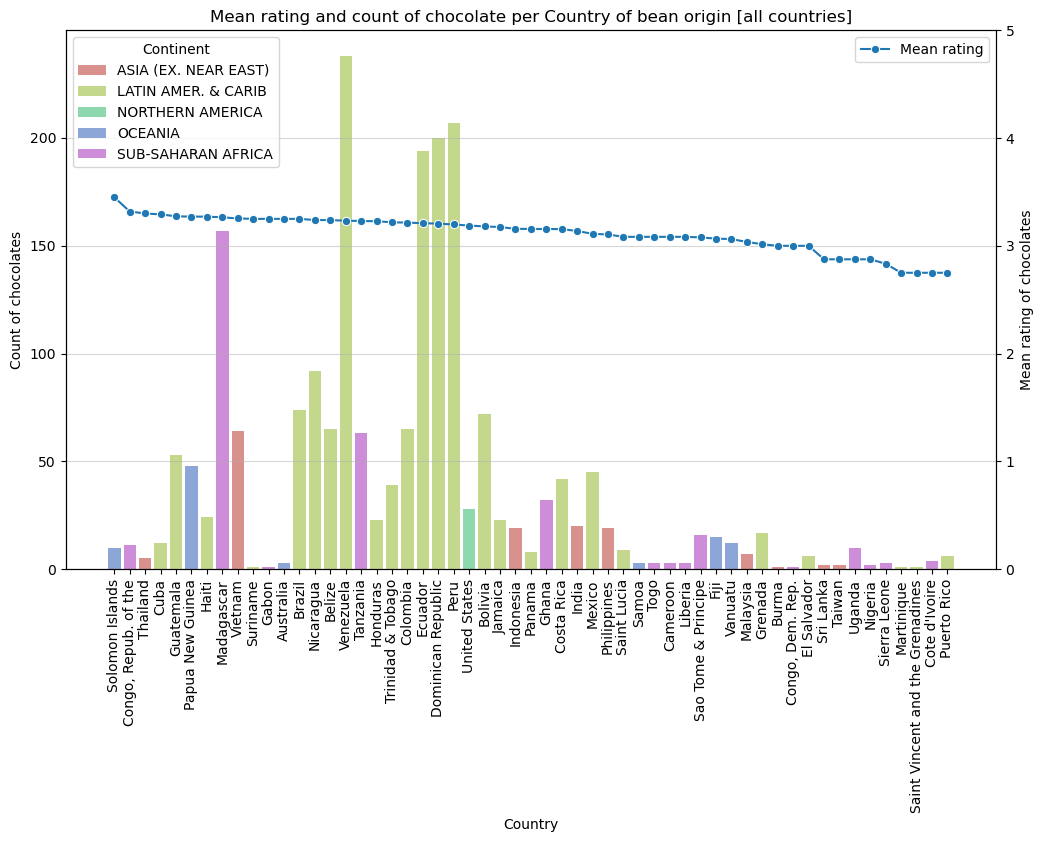

In [192]:
ax1 = sns.set_style(style=None) #, rc=None)

fig, ax1 = plt.subplots(figsize=(12,7))

plt.grid(axis='y', alpha=0.5)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Mean rating and count of chocolate per Country of bean origin [all countries]')
sns.barplot(data = df_country_mean_median, x='Country', y='count', alpha=0.75, ax=ax1, hue='Continent', 
            dodge=False, palette='hls', hue_order=ordered_continents)
sns.move_legend(ax1, 'upper left')
ax1.set_ylabel('Count of chocolates')
ax2 = ax1.twinx()
sns.lineplot(data = df_country_mean_median, x='Country', y='mean', marker='o', ax=ax2, label='Mean rating')
sns.move_legend(ax2, 'upper right')
ax2.set_ylabel('Mean rating of chocolates')
ax2.set_ylim([0, 5])
plt.show()

Best chocolates are from beans that came from Solomon Islands, then Congo, then Thailand. But we see that there are only few chocolates made from this beans - most origin from South America or African Island - Madagascar, what can be seen on maps shown below. First let's take a look on a plot that takes data only for countries of bean origin that are added to 10 or more chocolates.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



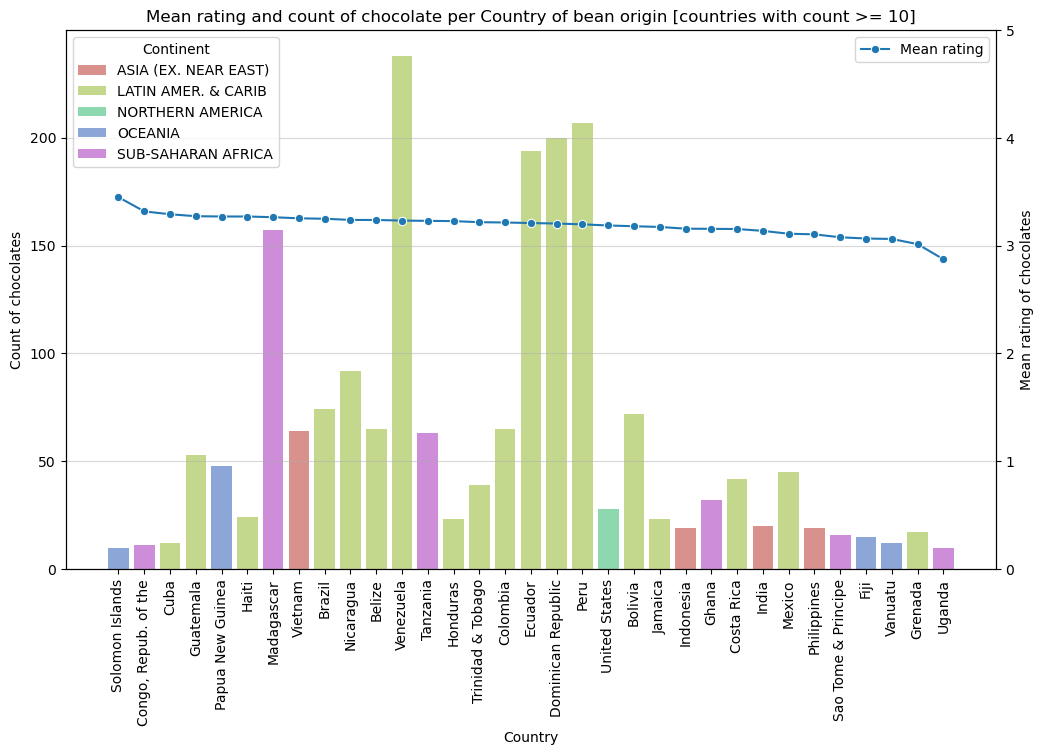

In [193]:
df_country_mean_median_10 = df_country_mean_median[df_country_mean_median['count'] >= 10]
ax3 = sns.set_style(style=None) #, rc=None)

fig, ax3 = plt.subplots(figsize=(12,7))
plt.grid(axis='y', alpha=0.5)
ax3.tick_params(axis='x', rotation=90)
ax3.set_title('Mean rating and count of chocolate per Country of bean origin [countries with count >= 10]')
sns.barplot(data = df_country_mean_median_10, x='Country', y='count', alpha=0.75, ax=ax3, hue='Continent', 
            dodge=False, palette='hls', hue_order=ordered_continents)
sns.move_legend(ax3, 'upper left')
ax3.set_ylabel('Count of chocolates')
ax4 = ax3.twinx()
sns.lineplot(data = df_country_mean_median_10, x='Country', y='mean', marker='o', ax=ax4, label='Mean rating')
sns.move_legend(ax4, 'upper right')
ax4.set_ylabel('Mean rating of chocolates')
ax4.set_ylim([0, 5])
plt.show()

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



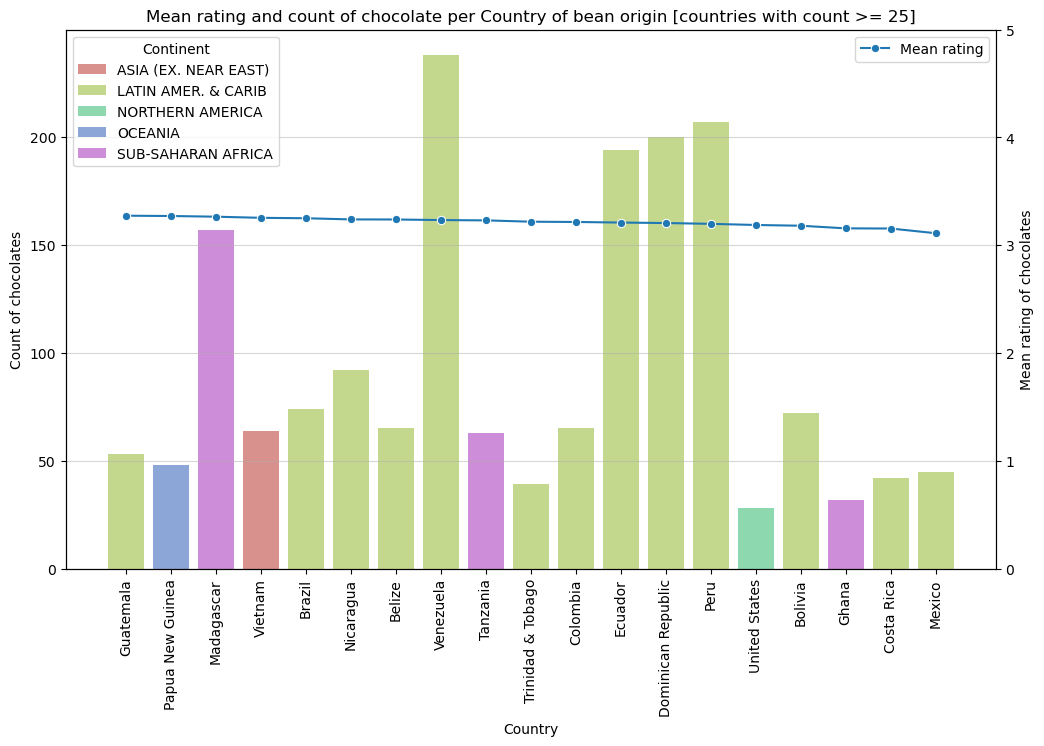

In [194]:
df_country_mean_median_25 = df_country_mean_median[df_country_mean_median['count'] >= 25]
ax3 = sns.set_style(style=None) #, rc=None)

fig, ax3 = plt.subplots(figsize=(12,7))
plt.grid(axis='y', alpha=0.5)
ax3.tick_params(axis='x', rotation=90)
ax3.set_title('Mean rating and count of chocolate per Country of bean origin [countries with count >= 25]')
sns.barplot(data = df_country_mean_median_25, x='Country', y='count', alpha=0.75, ax=ax3, hue='Continent', 
            dodge=False, palette='hls', hue_order=ordered_continents)
sns.move_legend(ax3, 'upper left')
ax3.set_ylabel('Count of chocolates')
ax4 = ax3.twinx()
sns.lineplot(data = df_country_mean_median_25, x='Country', y='mean', marker='o', ax=ax4, label='Mean rating')
sns.move_legend(ax4, 'upper right')
ax4.set_ylabel('Mean rating of chocolates')
ax4.set_ylim([0, 5])
plt.show()

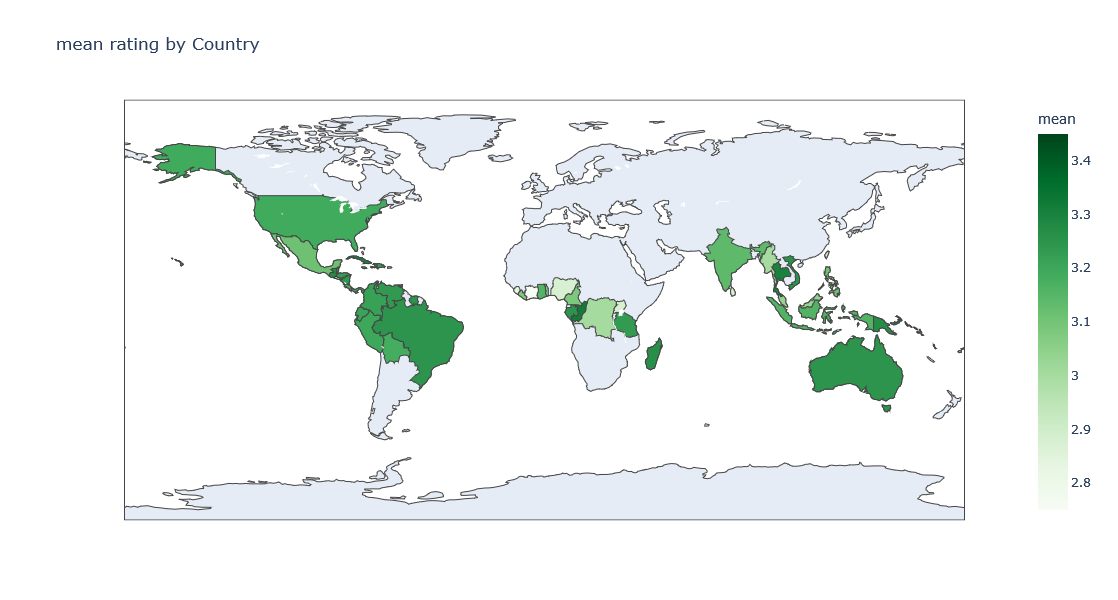

In [195]:
import plotly.express as px


fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='mean', hover_name='Country',
                    color_continuous_scale='greens',
                    title='mean rating by Country',
                    width=1000,
                    height=600
                    )
fig.show()

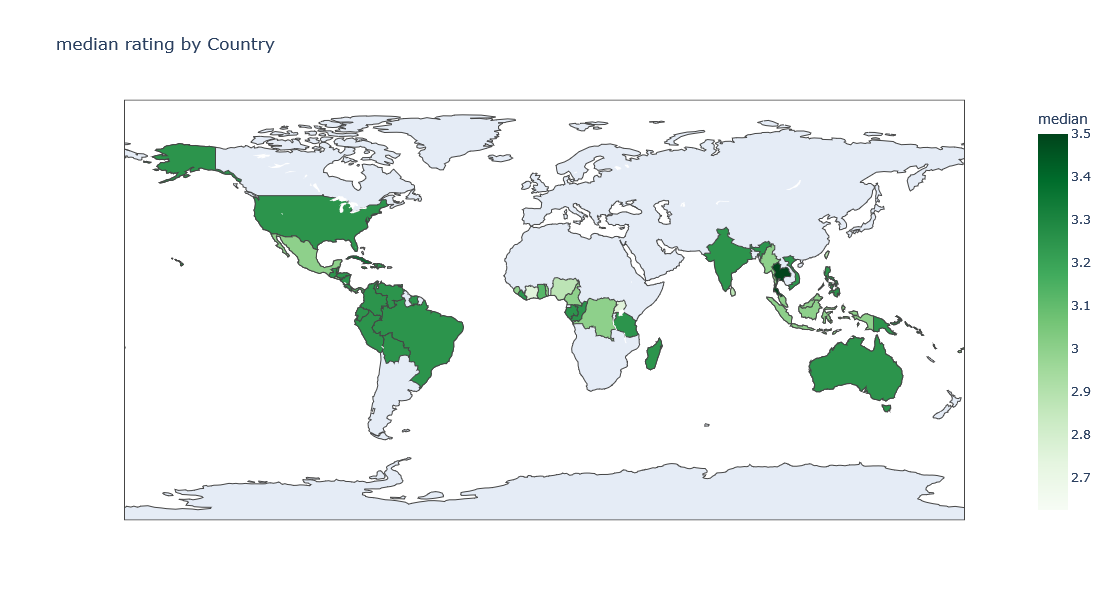

In [196]:

fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='median', hover_name='Country',
                    color_continuous_scale='greens',
                    title='median rating by Country',
                    width=1000,
                    height=600)
fig.show()

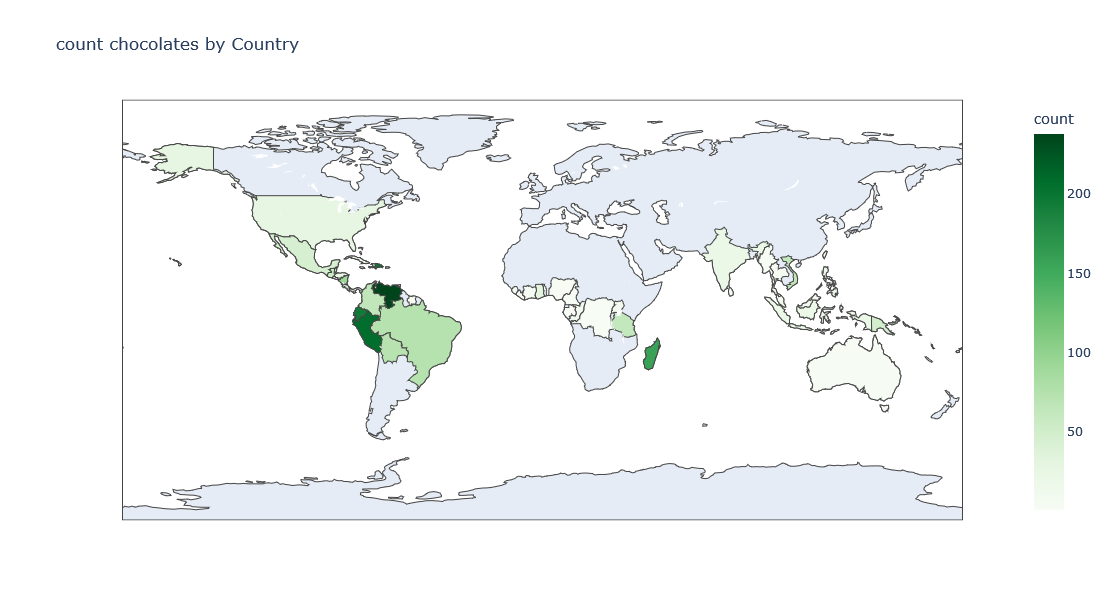

In [197]:
fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='count', hover_name='Country',
                    color_continuous_scale='greens',
                    title='count chocolates by Country',
                    width=1000,
                    height=600)
fig.show()

To sum up, the worst quality we get when the beans of cacao is mixed. Otherwise there is no big impact on the quality of chocolate -> for each continent median is the same and mean for the continent with the lowest mean value is 1,27 % less from the mean for continent with the highest mean value. From map we can conclude that Africa may produce worse quality beans, but there are few chocolates with cocoa beans that come from here. Except for Congo and Madagascar which give excellent chocolates. \
Most beans are raised in South America. Also, when looking at chart with mean rating for the country, it is clear that it is quite flat one with Solomon Islands on top and Puerto Rico at the end. When considering beans from countries with high count of chocolates that come from it is clear that they come mainly from South America.

Below there is a small analysis for chocolates with ratings >= 3.5. 

In [198]:
df_bean_origin_merge_3_5 = df_bean_origin_merge[df_bean_origin_merge['rating'] >= 3.5]
df_bean_origin_merge_3_5.head()

,Country,rating,Region
0,Madagascar,3.75,SUB-SAHARAN AFRICA
4,Madagascar,3.50,SUB-SAHARAN AFRICA
8,Madagascar,3.50,SUB-SAHARAN AFRICA
11,Madagascar,3.75,SUB-SAHARAN AFRICA
12,Madagascar,3.75,SUB-SAHARAN AFRICA


In [199]:
df_bean_origin_regions_3_5 = (df_bean_origin_merge_3_5
                          .groupby('Region')
                          .agg(
                                 mean=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values('mean', ascending=False)
                          .reset_index()
                         )
df_bean_origin_regions_3_5

,Region,mean,median,count
0,LATIN AMER. & CARIB,3.640625,3.5,592
1,OCEANIA,3.639706,3.5,34
2,SUB-SAHARAN AFRICA,3.633197,3.5,122
3,NORTHERN AMERICA,3.613636,3.5,11
4,ASIA (EX. NEAR EAST),3.569149,3.5,47


In [200]:
df_bean_origin_countries_3_5 = (df_bean_origin_merge_3_5
                                .groupby('Country')
                                .agg(
                                 mean=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values(by=['mean', 'count'], ascending=[False, False])
                          .reset_index()
                               )
df_bean_origin_countries_3_5 = df_bean_origin_countries_3_5.merge(df_countries, on='Country')
df_bean_origin_countries_3_5 = df_bean_origin_countries_3_5.rename(columns={'Region': 'Continent'})
df_bean_origin_countries_3_5.head(5)

,Country,mean,median,count,Continent
0,Jamaica,3.750000,3.75,6,LATIN AMER. & CARIB
1,Saint Lucia,3.750000,3.75,2,LATIN AMER. & CARIB
2,Australia,3.750000,3.75,1,OCEANIA
3,Mexico,3.708333,3.75,12,LATIN AMER. & CARIB
4,Indonesia,3.708333,3.75,6,ASIA (EX. NEAR EAST)


C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



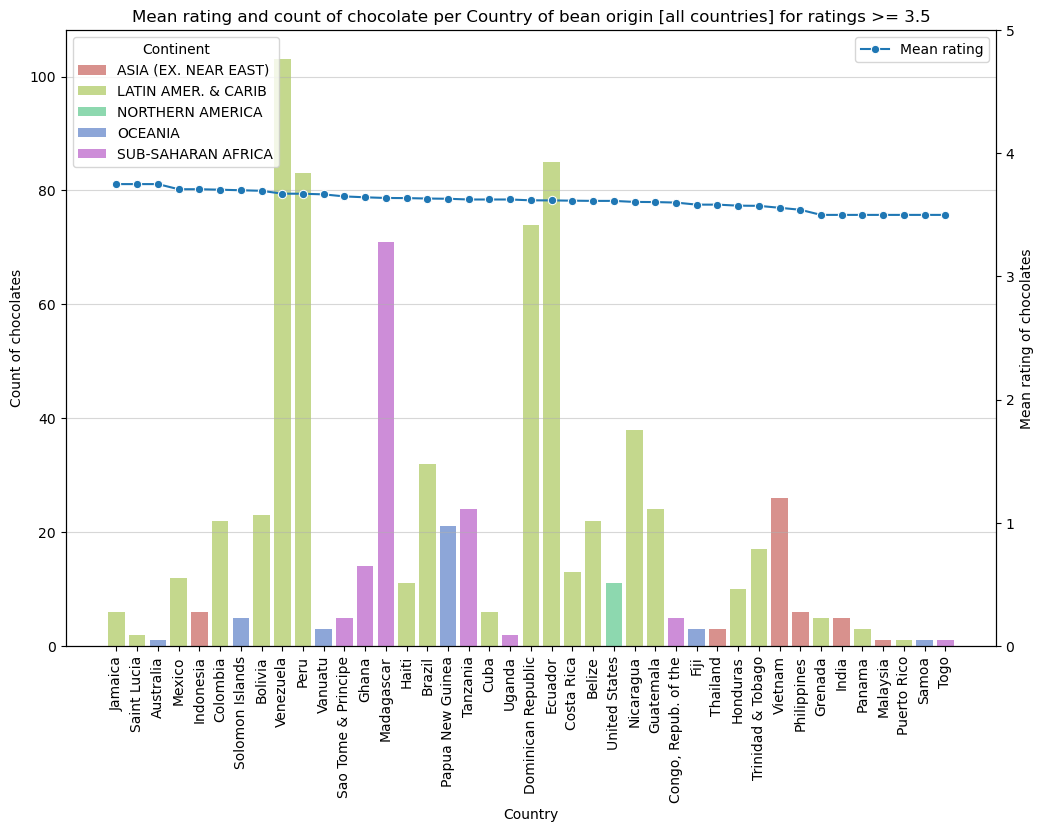

In [201]:
ax1 = sns.set_style(style=None) #, rc=None)

fig, ax1 = plt.subplots(figsize=(12,8))
plt.grid(axis='y', alpha=0.5)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Mean rating and count of chocolate per Country of bean origin [all countries] for ratings >= 3.5')
sns.barplot(data = df_bean_origin_countries_3_5, x='Country', y='count', alpha=0.75, ax=ax1, hue='Continent', 
            dodge=False, palette='hls', hue_order=ordered_continents)
sns.move_legend(ax1, 'upper left')
ax1.set_ylabel('Count of chocolates')
ax2 = ax1.twinx()
sns.lineplot(data = df_bean_origin_countries_3_5, x='Country', y='mean', marker='o', ax=ax2, label='Mean rating')
sns.move_legend(ax2, 'upper right')
ax2.set_ylabel('Mean rating of chocolates')
ax2.set_ylim([0, 5])
plt.show()

This plot shows how many of chocolates with ratings >= 3.5 origin from which country.

## Question no 5:
5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

In [202]:
# get the needed data
df_cocoa_percent_rating__for_boxplot = df[['ref', 'company', 'specific_bean_origin_or_bar_name', 'cocoa_percent', 'rating']]

In [203]:
df_cocoa_percent_rating__for_boxplot.head()

,ref,company,specific_bean_origin_or_bar_name,cocoa_percent,rating
0,2454,5150,"Bejofo Estate, batch 1",76.0,3.75
1,2458,5150,"Zorzal, batch 1",76.0,3.50
2,2454,5150,"Kokoa Kamili, batch 1",76.0,3.25
3,797,A. Morin,Peru,63.0,3.75
4,797,A. Morin,Bolivia,70.0,3.50


In [204]:
df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= 50, 'range'] = ' < 50'
for k in range(50, 100, 10):
    df_cocoa_percent_rating__for_boxplot.loc[np.logical_and(k < df_cocoa_percent_rating__for_boxplot['cocoa_percent'], 
                                              df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= k + 10), 'range'] = str(k) + '-' + str(k+10)
df_cocoa_percent_rating__for_boxplot.head()

C:\Users\Dom\AppData\Local\Temp\ipykernel_9028\1464013348.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ref,company,specific_bean_origin_or_bar_name,cocoa_percent,rating,range
0,2454,5150,"Bejofo Estate, batch 1",76.0,3.75,70-80
1,2458,5150,"Zorzal, batch 1",76.0,3.50,70-80
2,2454,5150,"Kokoa Kamili, batch 1",76.0,3.25,70-80
3,797,A. Morin,Peru,63.0,3.75,60-70
4,797,A. Morin,Bolivia,70.0,3.50,60-70


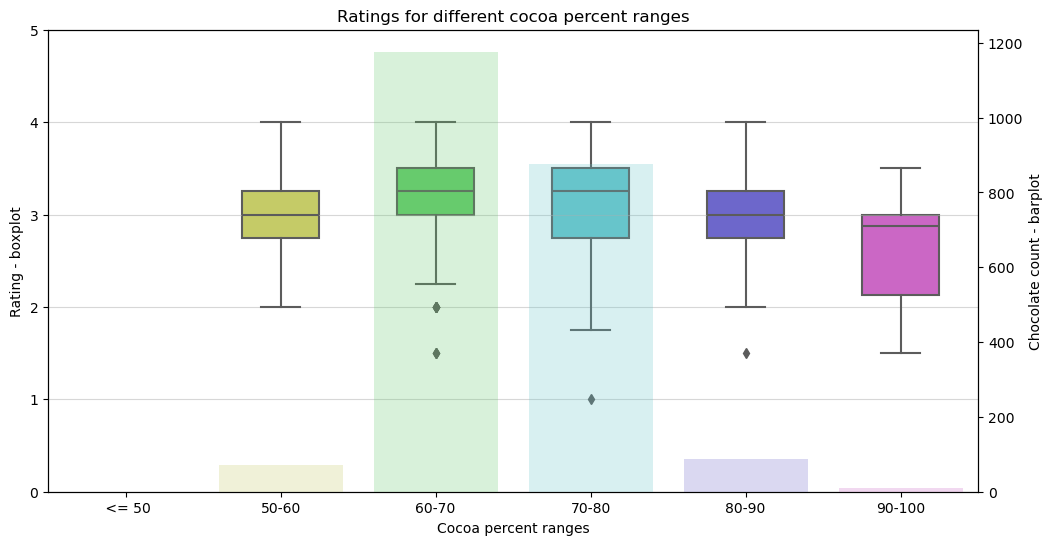

In [205]:
ax = sns.set_style(style=None) #, rc=None)
ranges_order = [' <= 50', '50-60', '60-70', '70-80', '80-90', '90-100']
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.boxplot(x="range", y="rating", data=df_cocoa_percent_rating__for_boxplot, order=ranges_order, palette='hls', width=0.5)
ax.set_title('Ratings for different cocoa percent ranges')
ax.set_ylabel('Rating - boxplot')
ax.set_ylim([0,5])
ax.set_xlabel('Cocoa percent ranges')
ax2 = ax.twinx()
sns.countplot(data = df_cocoa_percent_rating__for_boxplot, x='range', alpha=0.25, ax=ax2, palette='hls', order=ranges_order)
ax2.set_ylabel('Chocolate count - barplot')
plt.show()

So we see, that chocolates with cocoa percent in range 60-80 generally have higher ratings than other chocolates. They are also most numerous.
Let's see if anythong changes if we change the ranges to smaller ones. \
Ranges include bigger number, exclude smaller one, ex. 50-60: 50 < range <= 60. Otherwise chocolates with 100 % cocoa would be excluded from analysis.


In [206]:
df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= 50, 'range_2'] = ' <= 50'
for k in range(50, 100, 5):
    df_cocoa_percent_rating__for_boxplot.loc[np.logical_and(k < df_cocoa_percent_rating__for_boxplot['cocoa_percent'], 
                                              df_cocoa_percent_rating__for_boxplot['cocoa_percent'] <= k + 5), 'range_2'] = str(k) + '-' + str(k+5)
df_cocoa_percent_rating__for_boxplot.head()

C:\Users\Dom\AppData\Local\Temp\ipykernel_9028\133676325.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ref,company,specific_bean_origin_or_bar_name,cocoa_percent,rating,range,range_2
0,2454,5150,"Bejofo Estate, batch 1",76.0,3.75,70-80,75-80
1,2458,5150,"Zorzal, batch 1",76.0,3.50,70-80,75-80
2,2454,5150,"Kokoa Kamili, batch 1",76.0,3.25,70-80,75-80
3,797,A. Morin,Peru,63.0,3.75,60-70,60-65
4,797,A. Morin,Bolivia,70.0,3.50,60-70,65-70


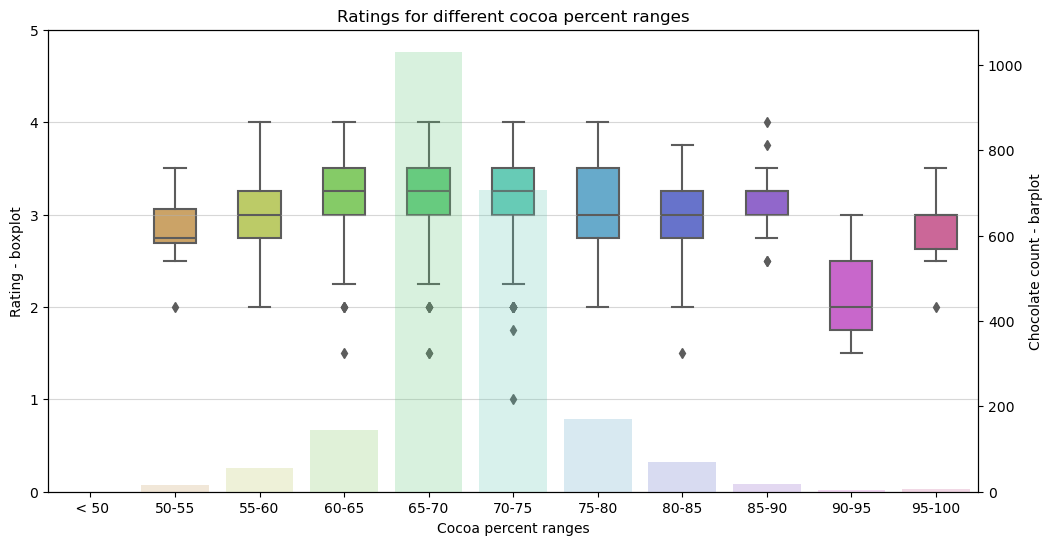

In [207]:
ax = sns.set_style(style=None) #, rc=None)
ranges_order_2 = [' < 50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
ax = sns.boxplot(x="range_2", y="rating", data=df_cocoa_percent_rating__for_boxplot, order=ranges_order_2, palette='hls', width=0.5)
ax.set_title('Ratings for different cocoa percent ranges')
ax.set_ylabel('Rating - boxplot')
ax.set_ylim([0,5])
ax.set_xlabel('Cocoa percent ranges')
ax2 = ax.twinx()
sns.countplot(data = df_cocoa_percent_rating__for_boxplot, x='range_2', alpha=0.25, ax=ax2, palette='hls', order=ranges_order_2)
ax2.set_ylabel('Chocolate count - barplot')
plt.show()

Most of the chocolates have cocoa percent 65-70. So maybe let's take a look at this range and we will be done with this analysis. 
Coclusion so far: the tester like most chocolate with cocoa percent 60-80. 

In [208]:
number_of_chocolates = (df_cocoa_percent_rating__for_boxplot
                                      .groupby('range_2')
                                      .agg(
                                              count=('range_2', 'count')
                                          )
                                      .sort_values(by='range_2')
                                      .reset_index()
                         )
number_of_chocolates.head()

,range_2,count
0,<= 50,3
1,50-55,16
2,55-60,55
3,60-65,145
4,65-70,1031


In [209]:
number_of_chocolates['percent_of_total_chocolates'] = np.round(number_of_chocolates['count'] / sum(number_of_chocolates['count']) * 100, 2)
number_of_chocolates.head()

,range_2,count,percent_of_total_chocolates
0,<= 50,3,0.13
1,50-55,16,0.72
2,55-60,55,2.47
3,60-65,145,6.52
4,65-70,1031,46.36


In [210]:
print(number_of_chocolates.loc[number_of_chocolates['range_2'].isin(['70-75', '65-70']), ['range_2', 'percent_of_total_chocolates']])
print('Total 65-75 in %:', sum(number_of_chocolates.loc[number_of_chocolates['range_2'].isin(['70-75', '65-70']), 'percent_of_total_chocolates']))

  range_2  percent_of_total_chocolates
4   65-70                        46.36
5   70-75                        31.74
Total 65-75 in %: 78.1


Let's take a closer look at range 65-75 percentage of cocoa in bars as it seems that there may be the best chocolates.

In [211]:
df_cocoa_65_75 = df_cocoa_percent_rating__for_boxplot.loc[df_cocoa_percent_rating__for_boxplot['range_2'].isin(['70-75', '65-70'])]
df_cocoa_65_75.head()

,ref,company,specific_bean_origin_or_bar_name,cocoa_percent,rating,range,range_2
4,797,A. Morin,Bolivia,70.0,3.50,60-70,65-70
5,1015,A. Morin,Chuao,70.0,4.00,60-70,65-70
7,1011,A. Morin,Equateur,70.0,3.75,60-70,65-70
8,1019,A. Morin,Chanchamayo Province,70.0,3.50,60-70,65-70
9,1011,A. Morin,Brazil,70.0,3.25,60-70,65-70


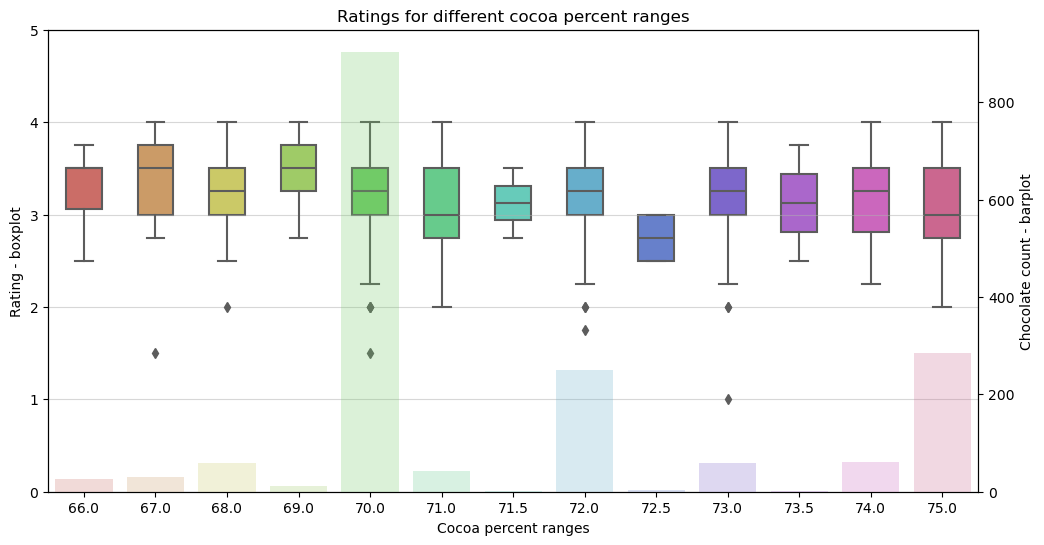

In [212]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
order_percents = sorted(df_cocoa_65_75['cocoa_percent'].unique())
sns.boxplot(x="cocoa_percent", y="rating", data=df_cocoa_65_75, order=order_percents, palette='hls', width=0.5)
ax.set_title('Ratings for different cocoa percent ranges')
ax.set_ylabel('Rating - boxplot')
ax.set_ylim([0,5])
ax.set_xlabel('Cocoa percent ranges')
ax2 = ax.twinx()
sns.countplot(data = df_cocoa_65_75, x="cocoa_percent", alpha=0.25, ax=ax2, palette='hls', order=order_percents)
ax2.set_ylabel('Chocolate count - barplot')
plt.show()


In [213]:
most_frequent_chocolates = (df_cocoa_percent_rating__for_boxplot
                                    .groupby('cocoa_percent')
                                    .agg(count=('rating', 'count'))
                                    .sort_values('count', ascending=False)
                                    .reset_index()
                                    .head(10)
                           )
most_frequent_chocolates['percent_of_all_reviewed_chocolates'] = round(most_frequent_chocolates['count'] / sum(number_of_chocolates['count']) * 100, 2)
most_frequent_chocolates

,cocoa_percent,count,percent_of_all_reviewed_chocolates
0,70.0,904,40.65
1,75.0,284,12.77
2,72.0,251,11.29
3,80.0,80,3.60
4,65.0,80,3.60
5,74.0,62,2.79
6,73.0,59,2.65
7,68.0,59,2.65
8,60.0,44,1.98
9,71.0,42,1.89


Let's take a look at boxplots for top 3 of most frequent cocoa contents (that is 70, 72 and 75 % of cocoa).

Conclusion: best chocolates have cocoa content 60-75 %. On top of that, most chocolates tested have such cocoa content (more than 80 %).

Let's answer second question in this part of analysis: What is the average cocoa content for bars with higher ratings (above 3.5)?

In [214]:
df_cocoa_percent_rating_more_3_5 = df_cocoa_percent_rating__for_boxplot[df_cocoa_percent_rating__for_boxplot['rating'] > 3.5]
df_cocoa_percent_rating_more_3_5.shape

(366, 7)

There is 366 (out of 2224) chocolates that have rating > 3.5.

In [215]:
df_cocoa_percent_rating_more_3_5['cocoa_percent'].describe()

count    366.000000
mean      70.982240
std        3.688239
min       50.000000
25%       70.000000
50%       70.000000
75%       72.000000
max       90.000000
Name: cocoa_percent, dtype: float64

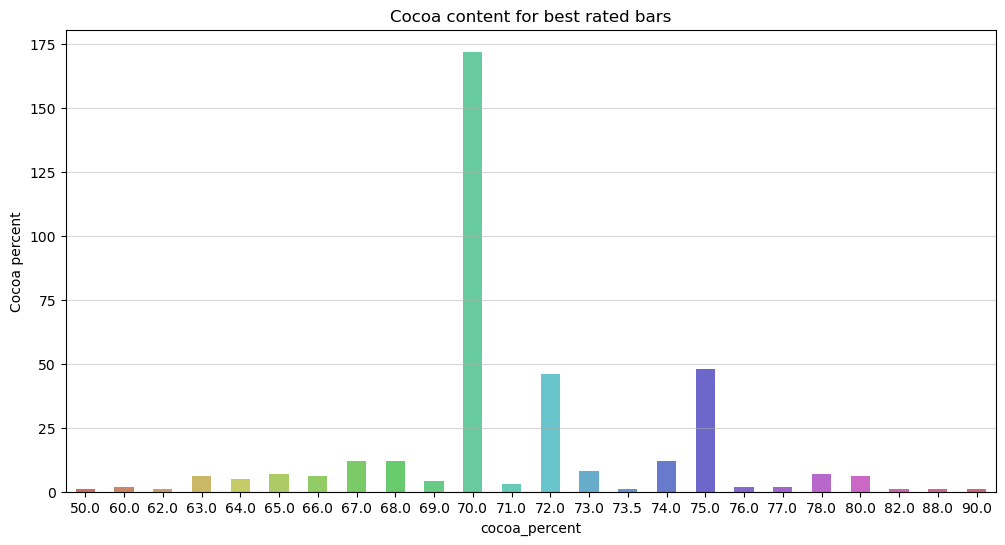

In [216]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.countplot(x="cocoa_percent", data=df_cocoa_percent_rating_more_3_5, palette='hls', width=0.5)
ax.set_title('Cocoa content for best rated bars')
ax.set_ylabel('Cocoa percent')
plt.show()

Most of best rated bars have 70 % of cocoa, then 75 and third is 72 % of cocoa. Average value though is 70,98 %.

## Question no 6:
6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [217]:
# prepare mean values
df_lecithin = (df
               .groupby('lecithin')
               .agg(
                   Count=('rating', 'count'),
                   Mean_Rating=('rating', 'mean'),
                   Median_Rating=('rating', 'median'),
                   Min_Rating=('rating', 'min'),
                   Max_Rating=('rating', 'max'),
                   Mean_Percent=('cocoa_percent', 'mean'),
                   Median_Percent=('cocoa_percent', 'median'),
                   Min_Percent=('cocoa_percent', 'min'),
                   Max_Percent=('cocoa_percent', 'max')
               )
              )
df_lecithin

,Count,Mean_Rating,Median_Rating,Min_Rating,Max_Rating,Mean_Percent,Median_Percent,Min_Percent,Max_Percent
lecithin,,,,,,,,,
have_lecithin,479,3.140397,3.00,1.0,4.0,69.965553,70.0,42.0,91.0
have_not_lecithin,1745,3.214527,3.25,1.5,4.0,71.913467,70.0,55.0,100.0


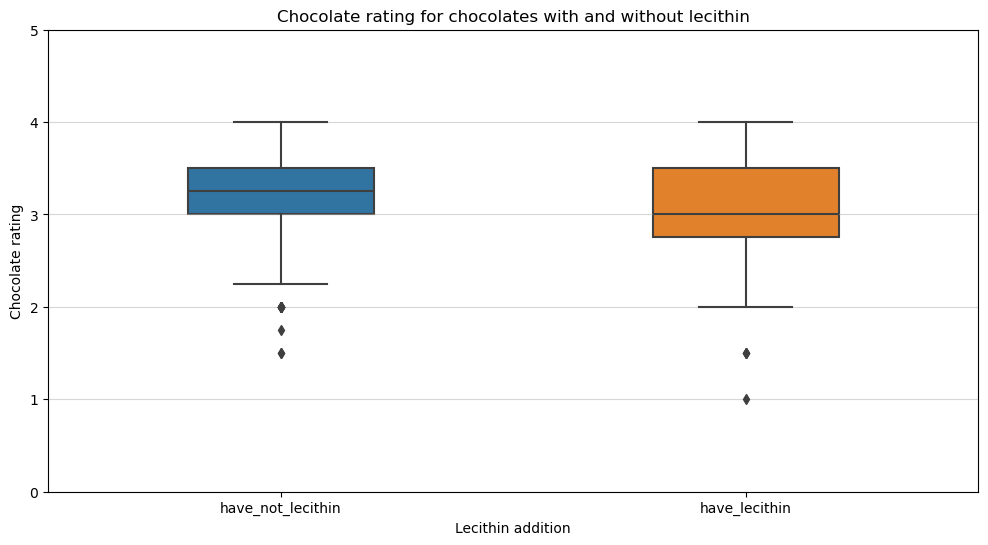

In [218]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.boxplot(x='lecithin', y='rating', data=df, width=0.4)  
ax.set_title('Chocolate rating for chocolates with and without lecithin')
ax.set_ylabel('Chocolate rating')
ax.set_xlabel('Lecithin addition')
ax.set_ylim([0, 5])
plt.show()

It seems that chocolate without lecithin is more delicious than chocolates including lecithin. \
It looks that lecithin is more often added to chocolates with lower cocoa content.

## Question no 7:
7. Which countries produce the highest rated bars?

In [219]:
set(df['company_location'].unique()) - set(df_countries['Country'])

{'Costa rica',
 'Czech republic',
 'Dominican republic',
 'El salvador',
 'New zealand',
 'Puerto rico',
 'Sao tome',
 'Sao tome & principe',
 'Scotland',
 'South africa',
 'South korea',
 'St. lucia',
 'St.vincent-grenadines',
 'U.S.A',
 'U.a.e.',
 'U.k.',
 'Wales'}

In [220]:
# rename non valid company location names in df
df.loc[df["company_location"] == "Costa rica", "company_location"] = 'Costa Rica'
df.loc[df["company_location"] == "Puerto rico", "company_location"] = 'Puerto Rico'
df.loc[df["company_location"] == "Czech republic", "company_location"] = 'Czech Republic'
df.loc[df["company_location"] == "Dominican republic", "company_location"] = 'Dominican Republic'
df.loc[df["company_location"] == "El salvador", "company_location"] = 'El Salvador'
df.loc[df["company_location"] == "New zealand", "company_location"] = 'New Zealand'
df.loc[df["company_location"] == "Sao tome", "company_location"] = 'Sao Tome & Principe'
df.loc[df["company_location"] == "Sao tome & principe", "company_location"] = 'Sao Tome & Principe'
df.loc[df["company_location"] == "Scotland", "company_location"] = 'United Kingdom'
df.loc[df["company_location"] == 'South africa', "company_location"] = 'South Africa'
df.loc[df["company_location"] == 'South korea', "company_location"] = 'South Korea'
df.loc[df["company_location"] == "St. lucia", "company_location"] = 'Saint Lucia'
df.loc[df["company_location"] == "St.vincent-grenadines", "company_location"] = 'Saint Vincent and the Grenadines'
df.loc[df["company_location"] == "U.S.A.", "company_location"] = 'United States'
df.loc[df["company_location"] == "U.S.A", "company_location"] = 'United States'
df.loc[df["company_location"] == 'U.a.e.', "company_location"] = 'United Arab Emirates'
df.loc[df["company_location"] == 'U.k.', "company_location"] = 'United Kingdom'
df.loc[df["company_location"] == 'Wales', "company_location"] = 'United Kingdom'

In [221]:
df['company_location'].nunique()

63

In [222]:
df_countries_bars = (df
                        .groupby('company_location')
                        .agg(
                            Mean_Rating=('rating', 'mean'),
                            Mean_Cocoa_Content=('cocoa_percent', 'mean'), 
                            Count=('rating', 'count')
                            )
                        .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
                        .reset_index()
                    )
df_countries_bars.head()

,company_location,Mean_Rating,Mean_Cocoa_Content,Count
0,Chile,3.750000,70.000000,2
1,Poland,3.500000,72.142857,7
2,Argentina,3.500000,70.000000,4
3,United Arab Emirates,3.375000,70.250000,4
4,Australia,3.367647,70.196078,51


Top 5 countries that produce best chocolates: Chile, Poland, Argentina, United Arab Emirates, Australia. But there are few chocolates produced by them, let's see how it looks when we consider countries that produce >= 10 chocolates.

In [223]:
df_countries_bars_50 = df_countries_bars[df_countries_bars['Count'] >= 10]
df_countries_bars_50

,company_location,Mean_Rating,Mean_Cocoa_Content,Count
4,Australia,3.367647,70.196078,51
5,Guatemala,3.350000,70.200000,10
6,Denmark,3.338710,70.000000,31
7,Vietnam,3.333333,74.333333,15
9,Switzerland,3.313953,71.255814,43
11,Canada,3.306962,71.943038,158
13,Brazil,3.271739,70.391304,23
14,Spain,3.264286,73.057143,35
15,France,3.263473,71.401198,167
16,Austria,3.258333,72.133333,30


Top 5 countries that produce best chocolates when count of each >= 10: Australia, Guatemala, Vietnam, Switzerland and Canada.

In [224]:
df = df.merge(df_countries, left_on='company_location', right_on='Country')
#df.drop(columns='Country', inplace=True)
df.rename(columns={'Region': 'Continent'}, inplace=True)
df.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'Country_x', 'Country_y', 'Continent'],
      dtype='object')

In [225]:
#df.drop(columns=['Country_x', 'Country_y', 'Country', 'Region_y'], inplace=True)
df.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'Country_x', 'Country_y', 'Continent'],
      dtype='object')

In [226]:
df.rename(columns={'Region_x': 'Continent'}, inplace=True)
df.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'Country_x', 'Country_y', 'Continent'],
      dtype='object')

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



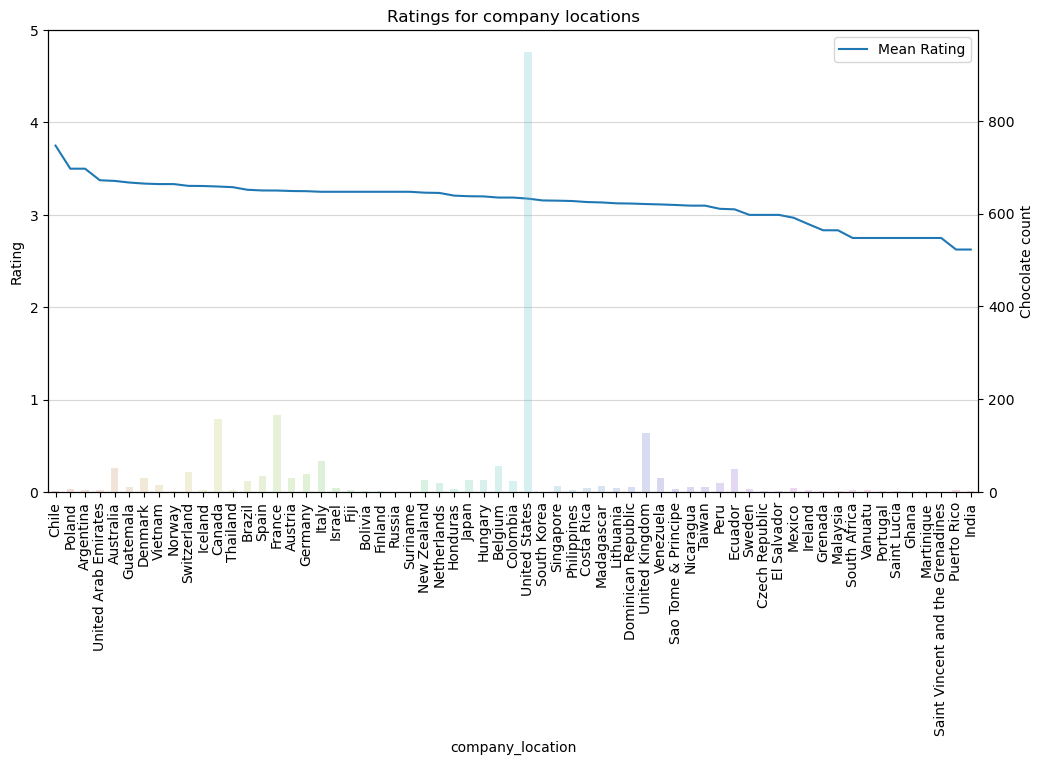

In [227]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
ax = sns.lineplot(x="company_location", y="Mean_Rating", data=df_countries_bars, label='Mean Rating') 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Ratings for company locations')
ax.set_ylabel('Rating')
ax.legend()
ax.set_ylim([0,5])
ax2 = ax.twinx()
sns.countplot(data = df, x='company_location', alpha=0.25, ax=ax2, palette='hls', width=0.5, order=df_countries_bars['company_location']) 
ax2.set_ylabel('Chocolate count')
plt.show()

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



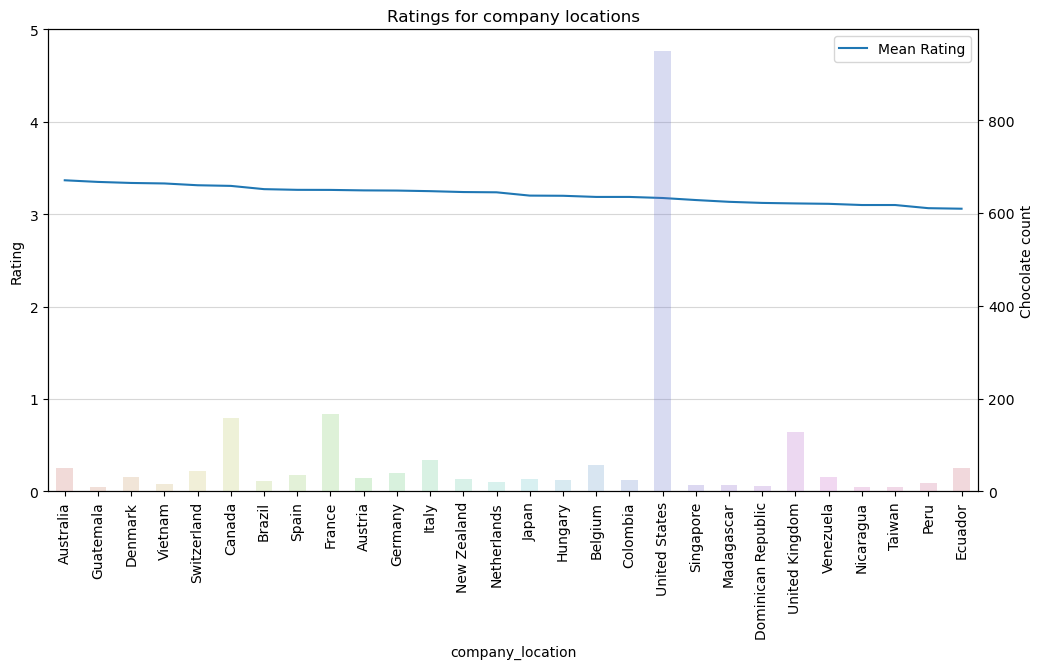

In [228]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
ax = sns.lineplot(x="company_location", y="Mean_Rating", data=df_countries_bars_50, label='Mean Rating')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Ratings for company locations')
ax.set_ylabel('Rating')
ax.legend()
ax.set_ylim([0,5])
ax2 = ax.twinx()
sns.countplot(data = df, x='company_location', alpha=0.25, ax=ax2, palette='hls', width=0.5, order=df_countries_bars_50['company_location'])
ax2.set_ylabel('Chocolate count')
plt.show()

## Questions 8 & 9:
8. Who creates the best chocolate bars?
9. Which company has highest rate?

In [229]:
df_companies_ratings = (df
                        .groupby('company')
                        .agg(
                            Mean_Rating=('rating', 'mean'),
                            Mean_Cocoa_Content=('cocoa_percent', 'mean'), 
                            Count=('rating', 'count')
                            )
                        .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
                        .reset_index()
                    )
df_companies_ratings.head(10)

,company,Mean_Rating,Mean_Cocoa_Content,Count
0,Heirloom Cacao Preservation (Zokoko),3.875000,70.000000,2
1,Ocelot,3.875000,72.500000,2
2,Matale,3.812500,71.000000,4
3,Patric,3.791667,69.833333,6
4,Idilio (Felchlin),3.775000,72.000000,10
5,Chocola'te,3.750000,69.000000,2
6,Obolo,3.750000,70.000000,2
7,Utopick,3.750000,70.000000,2
8,Kerchner,3.750000,70.000000,1
9,Landmark (Amano),3.750000,74.000000,1


In [230]:
df_companies_ratings_10 = df_companies_ratings[df_companies_ratings['Count'] >= 10]
df_companies_ratings_10.head(10)

,company,Mean_Rating,Mean_Cocoa_Content,Count
4,Idilio (Felchlin),3.775000,72.000000,10
21,Soma,3.591346,70.826923,52
22,Brasstown aka It's Chocolate,3.583333,72.083333,12
27,Ritual,3.541667,75.416667,12
28,Friis Holm,3.538462,69.076923,13
30,Arete,3.531250,70.531250,32
31,Bonnat,3.526786,74.642857,28
32,Domori,3.522727,70.136364,22
33,"Smooth Chocolator, The",3.514706,69.117647,17
77,Marou,3.454545,74.818182,11


When taking into consideration all companies listed, the best one is Heirloom Cacao Preservation (Zokoko) (with 2 chocolates). But when considering companies that more chocolates were tested then Idilio (Felchlin) is the best one (with 10 different bars), but second one on the list, Soma, has mean rating 3,59 while tested 52 bars, so this one is also very good.

## Question 10:
10. What is tester's favourite taste of chocolate?

In [231]:
df_first_taste_ratings = (df
                        .groupby('first_taste')
                        .agg(
                            Mean_Rating=('rating', 'mean'),
                            Mean_Cocoa_Content=('cocoa_percent', 'mean'), 
                            Count=('rating', 'count')
                            )
                        .dropna()
                        .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
                        .reset_index()
                    )
df_first_taste_ratings.rename(columns={'first_taste': 'taste'}, inplace=True)
df_first_taste_ratings

,taste,Mean_Rating,Mean_Cocoa_Content,Count
0,mild tart,4.0,71.0,2
1,blackberry and cinnamon,4.0,70.0,1
2,cardamon,4.0,70.0,1
3,chocolate covered banana,4.0,70.0,1
4,cinamon and nutmeg,4.0,73.0,1
...,...,...,...,...
451,multiple off flavors,2.0,75.0,1
452,non descript,2.0,73.0,1
453,sandpaper,2.0,81.0,1
454,chemical,1.5,65.0,1


In [232]:
df_second_taste_ratings = (df
                        .groupby('second_taste')
                        .agg(
                            Mean_Rating=('rating', 'mean'),
                            Mean_Cocoa_Content=('cocoa_percent', 'mean'), 
                            Count=('rating', 'count')
                            )
                        .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
                        .dropna()
                        .reset_index()
                    )
df_second_taste_ratings.rename(columns={'second_taste': 'taste'}, inplace=True)
df_second_taste_ratings

,taste,Mean_Rating,Mean_Cocoa_Content,Count
0,burnt brownie,4.00,67.0,1
1,delicate cocoa,4.00,65.0,1
2,dense,4.00,70.0,1
3,distinquished,4.00,70.0,1
4,homey,4.00,75.0,1
...,...,...,...,...
473,very bland,2.00,91.0,1
474,dominate off note,1.75,72.0,1
475,hint of fruit,1.50,91.0,1
476,strong chemical,1.50,67.0,1


In [233]:
df_third_taste_ratings = (df
                        .groupby('third_taste')
                        .agg(
                            Mean_Rating=('rating', 'mean'),
                            Mean_Cocoa_Content=('cocoa_percent', 'mean'), 
                            Count=('rating', 'count')
                            )
                        .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
                        .dropna()
                        .reset_index()
                    )
df_third_taste_ratings.rename(columns={'third_taste': 'taste'}, inplace=True)
df_third_taste_ratings

,taste,Mean_Rating,Mean_Cocoa_Content,Count
0,blackberry,4.0,70.0,1
1,clove,4.0,70.0,1
2,delicate fruit,4.0,74.0,1
3,gentle roast,4.0,75.0,1
4,tangerine,4.0,63.0,1
...,...,...,...,...
325,soapy,2.0,70.0,1
326,why bother,2.0,75.0,1
327,very bitter,1.5,88.0,2
328,unpleasant,1.5,70.0,1


In [234]:
df_fourth_taste_ratings = (df
                        .groupby('fourth_taste')
                        .agg(
                            Mean_Rating=('rating', 'mean'),
                            Mean_Cocoa_Content=('cocoa_percent', 'mean'), 
                            Count=('rating', 'count')
                            )
                        .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
                        .dropna()
                        .reset_index()
                    )
df_fourth_taste_ratings.rename(columns={'fourth_taste': 'taste'}, inplace=True)
df_fourth_taste_ratings

,taste,Mean_Rating,Mean_Cocoa_Content,Count
0,banana,4.00,60.0,1
1,bread,4.00,72.0,1
2,cheese,4.00,78.0,1
3,olive,4.00,70.0,1
4,raspberry,4.00,70.0,1
...,...,...,...,...
83,grape,2.50,71.0,1
84,medicinal,2.50,70.0,1
85,dry,2.25,70.0,1
86,vegetal,2.25,76.0,1


In [235]:
df_total_tastes = pd.concat([df_first_taste_ratings, df_second_taste_ratings, df_third_taste_ratings, df_fourth_taste_ratings])
df_total_tastes.reset_index(inplace=True)
df_total_tastes.drop(columns='index', inplace=True)
df_total_tastes

,taste,Mean_Rating,Mean_Cocoa_Content,Count
0,mild tart,4.00,71.0,2
1,blackberry and cinnamon,4.00,70.0,1
2,cardamon,4.00,70.0,1
3,chocolate covered banana,4.00,70.0,1
4,cinamon and nutmeg,4.00,73.0,1
...,...,...,...,...
1347,grape,2.50,71.0,1
1348,medicinal,2.50,70.0,1
1349,dry,2.25,70.0,1
1350,vegetal,2.25,76.0,1


In [236]:
df_total_tastes['total_rating'] = df_total_tastes['Mean_Rating'] * df_total_tastes['Count']
df_total_tastes['total_content'] = df_total_tastes['Mean_Cocoa_Content'] * df_total_tastes['Count']

In [237]:
df_new_total_tastes = (df_total_tastes
                                   .groupby('taste')
                                   .agg(
                                           Sum_Rating=('total_rating', 'sum'),
                                           Sum_Content=('total_content', 'sum'),
                                           Count=('Count', 'sum')
                                   )
                                   .reset_index()    
)
df_new_total_tastes.head()

,taste,Sum_Rating,Sum_Content,Count
0,Andes mint,3.25,71.0,1
1,Cadbury egg,3.75,70.0,1
2,Easter candy,2.75,70.0,1
3,Fruity,3.50,70.0,1
4,Roasty,3.50,70.0,1


In [238]:
df_new_total_tastes['Mean_Rating'] = df_new_total_tastes['Sum_Rating'] / df_new_total_tastes['Count']
df_new_total_tastes['Mean_Cocoa_Content'] = df_new_total_tastes['Sum_Content'] / df_new_total_tastes['Count']
df_new_total_tastes.drop(columns=['Sum_Rating', 'Sum_Content'], inplace=True)
df_new_total_tastes.head()

,taste,Count,Mean_Rating,Mean_Cocoa_Content
0,Andes mint,1,3.25,71.0
1,Cadbury egg,1,3.75,70.0
2,Easter candy,1,2.75,70.0
3,Fruity,1,3.50,70.0
4,Roasty,1,3.50,70.0


In [239]:
df_new_total_tastes.sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False], inplace=True)
df_new_total_tastes.head()

,taste,Count,Mean_Rating,Mean_Cocoa_Content
53,blackberry and cinnamon,1,4.0,70.0
86,burnt brownie,1,4.0,67.0
114,cardamon,1,4.0,70.0
137,chocolate covered banana,1,4.0,70.0
147,cinamon and nutmeg,1,4.0,73.0


In [240]:
df_new_total_tastes.shape

(837, 4)

In [241]:
df_new_total_tastes_5 = df_new_total_tastes[df_new_total_tastes['Count'] >= 15]

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



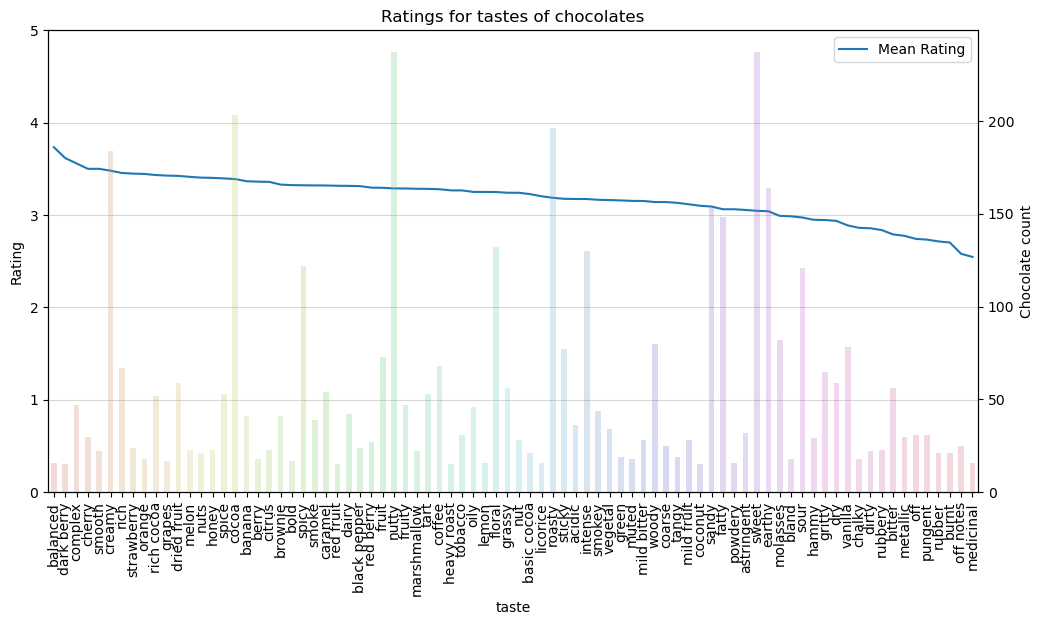

In [242]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
ax = sns.lineplot(x="taste", y="Mean_Rating", data=df_new_total_tastes_5, label='Mean Rating')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Ratings for tastes of chocolates')
ax.set_ylabel('Rating')
ax.legend()
ax.set_ylim([0,5])
ax2 = ax.twinx()
sns.barplot(data = df_new_total_tastes_5, x='taste', y='Count', alpha=0.25, ax=ax2, palette='hls', width=0.5, order=df_new_total_tastes_5['taste']) 
ax2.set_ylabel('Chocolate count')
plt.show()

It looks that the tester enjoys delicate, balansed, fruity, nutty tastes and dislikes chemical and strong ones. Vanilla taste is also at the end of stake. There are some also that he described as 'off notes'.

## Question 11:
11. Does number of ingredients impact rating?

In [278]:
df_count_of_ingredients = (df
                               .groupby('counts_of_ingredients')
                               .agg(Mean_Rating=('rating', 'mean'), Count=('rating', 'count'))
                               .sort_values(by='counts_of_ingredients', ascending=True)
                               .reset_index()
                          )
df_count_of_ingredients['counts_of_ingredients'] = df_count_of_ingredients['counts_of_ingredients'].astype(str)
df_count_of_ingredients

,counts_of_ingredients,Mean_Rating,Count
0,1,2.950000,5
1,2,3.202588,657
2,3,3.264026,909
3,4,3.116667,450
4,5,3.079843,191
5,6,2.937500,4


C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



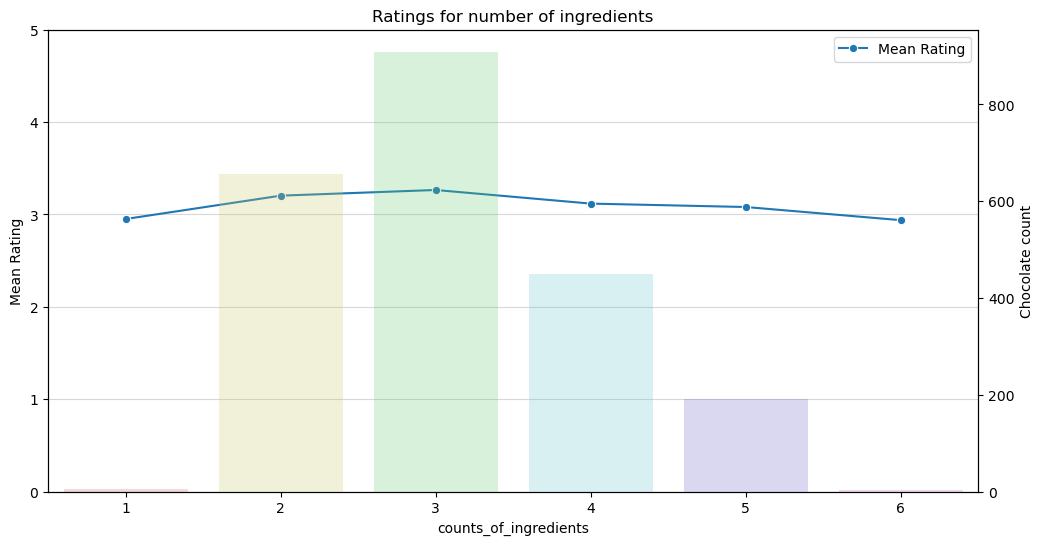

In [279]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
ax.set_title('Ratings for number of ingredients')
ax = sns.lineplot(x="counts_of_ingredients", y="Mean_Rating", data=df_count_of_ingredients, label='Mean Rating', marker='o', ax=ax)
ax2 = ax.twinx()
ax.set_ylabel('Mean Rating')
ax.legend()
ax.set_ylim([0,5])
ax2 = sns.barplot(data = df_count_of_ingredients, x='counts_of_ingredients', y ='Count', alpha=0.25, ax=ax2, palette='hls')
ax2.set_ylabel('Chocolate count')
plt.show()

Best chocolate bars have 2 to 3 ingredients.

## SUMMARY

In my findings, there is no big impact of where from is the bean, but more important is the technology or the recipe from the company. Best chocolate bars are from Australia if considering the country, best manufacturers being Idilio (Felchlin) from Switzerland and Soma from Canada. Best tastes are fruity ones, cocoa, nutty etc. Tester dislikes chemical, vanilla and metallic flavours. He also likes chocolates having 65-75 % of cocoa. Bars without lecithin are also more delicious for tester. Best bars have also from 2 to 3 ingredients. \
As I am from Poland, I wonder what chocolate manufacturer is in this dataset - it is Manufaktura Czekolady. I had once pleassure to taste their chocolate and it was really good and I see that this tester also really liked it. \
Below - after the information regarding polish chocolates, there are some tables making me sure of my conclusion.


In [246]:
df[df['company_location']=='Poland']

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,Country_x,Country_y,Continent
2141,871,Manufaktura Czekolady,Poland,2012,Ghana,Grand Cru Ghana,70.0,3.50,2,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,coconut,NaN,NaN,nan,Poland,EASTERN EUROPE
2142,871,Manufaktura Czekolady,Poland,2012,Dominican republic,Grand Cru Dominican Republic,70.0,3.25,2,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,chewy,brownie like,NaN,NaN,nan,Poland,EASTERN EUROPE
2143,875,Manufaktura Czekolady,Poland,2012,Ecuador,Grand Cru Ecuador,70.0,3.25,2,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,grits,roaste brownie,NaN,NaN,nan,Poland,EASTERN EUROPE
2144,1255,Manufaktura Czekolady,Poland,2014,Venezuela,Porcelana,70.0,3.75,2,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,intense,roasty,NaN,nan,Poland,EASTERN EUROPE
2145,1279,Manufaktura Czekolady,Poland,2014,Colombia,Kolumbia,85.0,3.50,2,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,coarse,intense,nutty,NaN,nan,Poland,EASTERN EUROPE
2146,1844,Manufaktura Czekolady,Poland,2016,Nicaragua,Johe,70.0,3.75,3,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,basic,balanced,deep cocoa,NaN,nan,Poland,EASTERN EUROPE
2147,1848,Manufaktura Czekolady,Poland,2016,Peru,Peru,70.0,3.50,3,have_bean,...,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,roasty,NaN,NaN,nan,Poland,EASTERN EUROPE


In [247]:
(df[df['country_of_bean_origin'] =='Madagascar']
    .groupby(['company_location', 'company'])
    .agg(Count=('rating', 'count'), Mean_Rating=('rating', 'mean'))
    .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
    .reset_index()
)

,company_location,company,Count,Mean_Rating
0,Australia,Matale,1,4.000000
1,United States,Ritual,1,4.000000
2,France,Bonnat,2,3.875000
3,United States,Patric,3,3.833333
4,Canada,Soma,3,3.750000
...,...,...,...,...
111,Madagascar,Menakao (aka Cinagra),2,2.500000
112,United Kingdom,Paul Young,2,2.500000
113,Hungary,Rozsavolgyi,1,2.500000
114,United States,Dean and Deluca (Belcolade),1,2.500000


In [248]:
(df[df['company_location'] =='Australia']
    .groupby(['company', 'country_of_bean_origin'])
    .agg(Count=('rating', 'count'), Mean_Rating=('rating', 'mean'))
    .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
    .reset_index()
)

,company,country_of_bean_origin,Count,Mean_Rating
0,"Smooth Chocolator, The",Ecuador,2,4.000
1,Matale,Madagascar,1,4.000
2,Matale,Papua new guinea,1,4.000
3,"Smooth Chocolator, The",Venezuela,2,3.750
4,Matale,Blend,1,3.750
5,"Smooth Chocolator, The",Australia,1,3.750
6,"Smooth Chocolator, The",Belize,1,3.750
7,"Smooth Chocolator, The",Tanzania,1,3.750
8,"Smooth Chocolator, The",Trinidad,1,3.750
9,Spencer,Ecuador,1,3.750


In [280]:
(df[df['company'] =='Idilio (Felchlin)']
    .groupby(['company_location', 'country_of_bean_origin'])
    .agg(Count=('rating', 'count'), Mean_Rating=('rating', 'mean'))
    .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
    .reset_index()
)

,company_location,country_of_bean_origin,Count,Mean_Rating
0,Switzerland,Venezuela,10,3.775


In [281]:
(df[df['company'] =='Soma']
    .groupby(['company_location', 'country_of_bean_origin'])
    .agg(Count=('rating', 'count'), Mean_Rating=('rating', 'mean'))
    .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
    .reset_index()
)

,company_location,country_of_bean_origin,Count,Mean_Rating
0,Canada,Colombia,1,4.000000
1,Canada,Jamaica,1,4.000000
2,Canada,Vietnam,1,4.000000
3,Canada,Blend,10,3.750000
4,Canada,Madagascar,3,3.750000
5,Canada,Trinidad,1,3.750000
6,Canada,U.s.a.,1,3.750000
7,Canada,Vanuatu,1,3.750000
8,Canada,Venezuela,9,3.722222
9,Canada,Nicaragua,3,3.500000


In [282]:
(df[df['country_of_bean_origin'] =='Blend']
    .groupby(['company_location', 'company'])
    .agg(Count=('rating', 'count'), Mean_Rating=('rating', 'mean'))
    .sort_values(by=['Mean_Rating', 'Count'], ascending=[False, False])
    .reset_index()
)

,company_location,company,Count,Mean_Rating
0,France,Bonnat,3,3.833333
1,Canada,Soma,10,3.750000
2,Belgium,Pierre Marcolini,2,3.750000
3,Australia,Matale,1,3.750000
4,Germany,Coppeneur,1,3.750000
...,...,...,...,...
59,France,Michel Cluizel,3,2.000000
60,Switzerland,Felchlin,1,2.000000
61,United States,Casa,1,2.000000
62,Belgium,Neuhaus (Callebaut),2,1.500000
